In [64]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [65]:
company_data = pd.read_csv("C:\\ExcelR\\Data Science Assignments\\14-Decision Trees\\Company_Data.csv")

In [66]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [67]:
#Creating Dummy Variables.
company_data = pd.get_dummies(company_data,columns=['ShelveLoc','US','Urban'],drop_first=True)

In [68]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1
396,6.14,139,23,3,37,120,55,11,0,1,1,0
397,7.41,162,26,12,368,159,40,18,0,1,1,1
398,5.94,100,79,7,284,95,50,12,0,0,1,1


In [69]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Price             400 non-null    int64  
 6   Age               400 non-null    int64  
 7   Education         400 non-null    int64  
 8   ShelveLoc_Good    400 non-null    uint8  
 9   ShelveLoc_Medium  400 non-null    uint8  
 10  US_Yes            400 non-null    uint8  
 11  Urban_Yes         400 non-null    uint8  
dtypes: float64(1), int64(7), uint8(4)
memory usage: 26.7 KB


In [70]:
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

In [71]:
df_com_data_norm = norm_func(company_data.iloc[:,1:])
df_com_data_norm.tail(10)

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes
390,0.316327,0.545455,0.310345,0.102204,0.520958,0.763636,0.250,0.0,1.0,1.0,1.0
391,0.775510,0.424242,0.000000,0.078156,0.598802,0.563636,0.750,0.0,0.0,0.0,1.0
392,0.530612,0.212121,0.448276,0.611222,0.634731,0.163636,0.375,0.0,0.0,1.0,1.0
393,0.326531,0.303030,0.344828,0.032064,0.574850,0.090909,0.875,0.0,1.0,1.0,0.0
394,0.540816,0.373737,0.655172,0.713427,0.688623,0.145455,0.750,0.0,0.0,1.0,1.0
395,0.622449,0.878788,0.586207,0.386774,0.622754,0.145455,0.500,1.0,0.0,1.0,1.0
396,0.632653,0.020202,0.103448,0.054108,0.574850,0.545455,0.125,0.0,1.0,1.0,0.0
397,0.867347,0.050505,0.413793,0.717435,0.808383,0.272727,1.000,0.0,1.0,1.0,1.0
398,0.234694,0.585859,0.241379,0.549098,0.425150,0.454545,0.250,0.0,0.0,1.0,1.0
399,0.581633,0.161616,0.000000,0.034068,0.574850,0.436364,0.750,1.0,0.0,1.0,1.0


In [72]:
feature_cols_com_data = ['Sales','Income','Advertising','Population','Price','Age','Education']

In [73]:
label_com_data = ['CompPrice']

In [74]:
X = company_data[feature_cols_com_data] # Features

In [75]:
X

,Sales,Income,Advertising,Population,Price,Age,Education
0,9.50,73,11,276,120,42,17
1,11.22,48,16,260,83,65,10
2,10.06,35,10,269,80,59,12
3,7.40,100,4,466,97,55,14
4,4.15,64,3,340,128,38,13
...,...,...,...,...,...,...,...
395,12.57,108,17,203,128,33,14
396,6.14,23,3,37,120,55,11
397,7.41,26,12,368,159,40,18
398,5.94,79,7,284,95,50,12


In [76]:
y = company_data[label_com_data] # Target variable

In [77]:
y

,CompPrice
0,138
1,111
2,113
3,117
4,141
...,...
395,138
396,139
397,162
398,100


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [79]:
from sklearn import tree

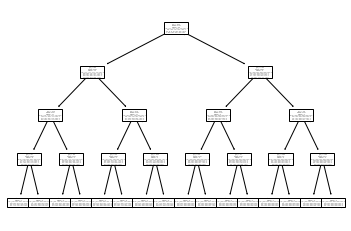

In [80]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(X_train,y_train)
#PLot the decision tree
tree.plot_tree(model);

In [81]:
clf = DecisionTreeClassifier()

In [82]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [83]:
clf = clf.fit(X_train,y_train)

In [84]:
y_pred = clf.predict(X_test)

In [85]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.03333333333333333


In [86]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [87]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [88]:
#Find the accuracy
model.score(X_test,y_test)

-0.07811537579573713